In [225]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
df = pd.read_csv('./WDO$N_M1_202211160900_202211161829.csv', sep='\t')
df.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2022.11.16,09:00:00,5360.0,5382.5,5358.0,5371.0,8259,20036,500
1,2022.11.16,09:01:00,5372.0,5388.5,5364.0,5384.0,11259,25088,500
2,2022.11.16,09:02:00,5384.5,5385.5,5373.0,5383.0,7918,18076,500
3,2022.11.16,09:03:00,5383.0,5394.5,5381.0,5387.0,11709,25396,500
4,2022.11.16,09:04:00,5387.0,5393.0,5380.0,5386.0,8417,21503,500


In [227]:
df = df.rename(columns={
  "<DATE>": "date", 
  "<TIME>": "time",
  "<OPEN>": "open",
  "<HIGH>": "high",
  "<LOW>": "low",
  "<CLOSE>": "close",
  "<TICKVOL>": "tickvol",
  "<VOL>": "vol",
  "<SPREAD>": "spread",
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     570 non-null    object 
 1   time     570 non-null    object 
 2   open     570 non-null    float64
 3   high     570 non-null    float64
 4   low      570 non-null    float64
 5   close    570 non-null    float64
 6   tickvol  570 non-null    int64  
 7   vol      570 non-null    int64  
 8   spread   570 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.2+ KB


In [228]:
df['datetime'] = pd.to_datetime(df['date'] + df['time'], format='%Y.%m.%d%H:%M:%S')

df.drop("date", axis=1, inplace=True)
df.drop("time", axis=1, inplace=True)

df.set_index('datetime', inplace=True)

df.head()

,open,high,low,close,tickvol,vol,spread
datetime,,,,,,,
2022-11-16 09:00:00,5360.0,5382.5,5358.0,5371.0,8259,20036,500
2022-11-16 09:01:00,5372.0,5388.5,5364.0,5384.0,11259,25088,500
2022-11-16 09:02:00,5384.5,5385.5,5373.0,5383.0,7918,18076,500
2022-11-16 09:03:00,5383.0,5394.5,5381.0,5387.0,11709,25396,500
2022-11-16 09:04:00,5387.0,5393.0,5380.0,5386.0,8417,21503,500


In [229]:
df.describe()

,open,high,low,close,tickvol,vol,spread
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.0
mean,5371.484211,5374.215789,5368.931579,5371.582456,2743.457895,7802.594737,500.0
std,28.741190,28.125736,29.448872,28.842236,2173.914745,5904.858711,0.0
min,5307.000000,5313.000000,5304.500000,5306.500000,144.000000,299.000000,500.0
25%,5351.000000,5353.500000,5347.125000,5351.000000,1122.250000,3277.500000,500.0
50%,5368.750000,5371.500000,5366.000000,5368.750000,2259.500000,6439.000000,500.0
75%,5400.875000,5402.875000,5399.750000,5401.000000,3757.000000,10872.250000,500.0
max,5425.500000,5427.000000,5422.500000,5425.000000,11709.000000,32696.000000,500.0


In [230]:
import datetime

# datetime.datetime.now().time()

time = df.index.map(lambda t: t.time())
time

Index([09:00:00, 09:01:00, 09:02:00, 09:03:00, 09:04:00, 09:05:00, 09:06:00,
       09:07:00, 09:08:00, 09:09:00,
       ...
       18:20:00, 18:21:00, 18:22:00, 18:23:00, 18:24:00, 18:25:00, 18:26:00,
       18:27:00, 18:28:00, 18:29:00],
      dtype='object', name='datetime', length=570)

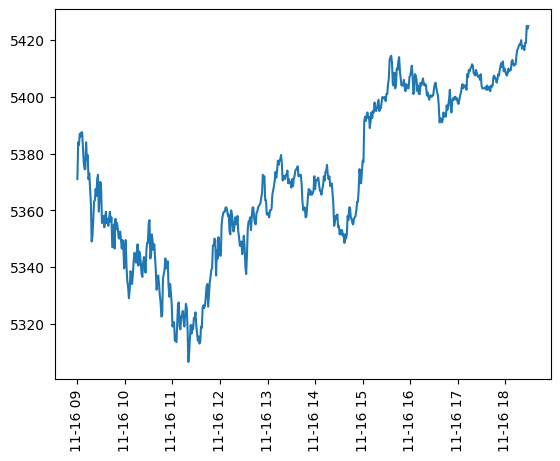

In [231]:
plt.xticks(rotation=90)
plt.plot(df.index, df['close'])

In [232]:
train, test = train_test_split(
  df.to_numpy(),  
  random_state=1, 
  test_size=0.2
)
scaler = MinMaxScaler(feature_range=(0, 1))
x_trainscaled = scaler.fit_transform(train)
x_testscaled = scaler.transform(test)

In [233]:
x_train = []
y_train = []
mins_used_to_predict = 60

for i in range(mins_used_to_predict, len(x_trainscaled)):

    #60 ultimos dias
    x_train.append(x_trainscaled[i - mins_used_to_predict: i, 3])
    #cotacao
    y_train.append(x_trainscaled[i, 3])

    # if i <= 61:

print(len(x_train))
print(len(y_train))

396
396


In [234]:
x_test = []
y_test = []
mins_used_to_predict = 60

for i in range(mins_used_to_predict, len(x_testscaled)):

    #60 ultimos dias
    x_test.append(x_testscaled[i - mins_used_to_predict: i, 3])
    #cotacao
    y_test.append(x_testscaled[i, 3])

    # if i <= 61:

print(len(x_test))
print(len(y_test))

54
54


In [235]:
model = MLPRegressor(
  hidden_layer_sizes=(7, 1),
  # activation='tanh',
  # solver= 'adam',
).fit(x_train, y_train)

print(model.score(x_test, y_test))

0.0006444166694904441


In [236]:
x_test = np.array(x_test)
# x_test = x_test.reshape(60, 1)
predicts = model.predict(x_test)
predicts = scaler.inverse_transform(predicts)
predicts
# x_test

ValueError: Expected 2D array, got 1D array instead:
array=[0.54452797 0.54452797 0.54452797 0.54842478 0.54452797 0.54452797
 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797
 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797
 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797
 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797
 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797
 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797
 0.54956071 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797
 0.54452797 0.54452797 0.54452797 0.54452797 0.54452797 0.55073494].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.